# 02 - Visualize Reference Points
Plot clustered reference points and inspect spatial coverage.

In [2]:
import sys
from pathlib import Path

root = Path.cwd().parent   # notebooks → project root
sys.path.append(str(root))

### 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
from pathlib import Path

RPS_DIR = Path("data/processed/rps")
GRAPH_DIR = Path("data/processed/graphs")

# Load one domain for visualization
rp_path = list(RPS_DIR.glob("train_rps_*.parquet"))[0]
graph_path = list(GRAPH_DIR.glob("train_graph_*.json"))[0]

rps_df = pd.read_parquet(rp_path)
with open(graph_path) as f:
    graph = json.load(f)

rps_df.head()

,domain_id,rp_id,x,y,ap_ids,rssi
0,0_0,rp_0,-13.024299,-20.180508,"[7, 13, 14, 23, 24, 53, 54, 71, 72, 80, 81, 15...","[-82.05, -76.0, -76.17948717948718, -90.0, -89..."
1,0_0,rp_1,2.217162,40.301685,"[27, 28, 33, 34, 51, 52, 57, 58, 75, 76, 161, ...","[-82.75, -83.2, -73.009009009009, -72.24038461..."
2,0_0,rp_2,49.471103,26.878973,"[27, 28, 30, 36, 57, 58, 75, 76, 33, 34, 35, 1...","[-86.6, -85.44736842105263, -87.57142857142857..."
3,0_0,rp_3,0.546451,-43.770291,"[7, 13, 23, 24, 29, 30, 53, 54, 80, 81, 155, 1...","[-55.0, -87.57894736842105, -77.73333333333333..."
4,0_0,rp_4,21.089140,19.669531,"[25, 28, 33, 51, 52, 57, 58, 71, 72, 75, 76, 1...","[-92.0, -81.71428571428571, -81.73333333333333..."


### Plot RPs

In [19]:
len(rps_df)

15

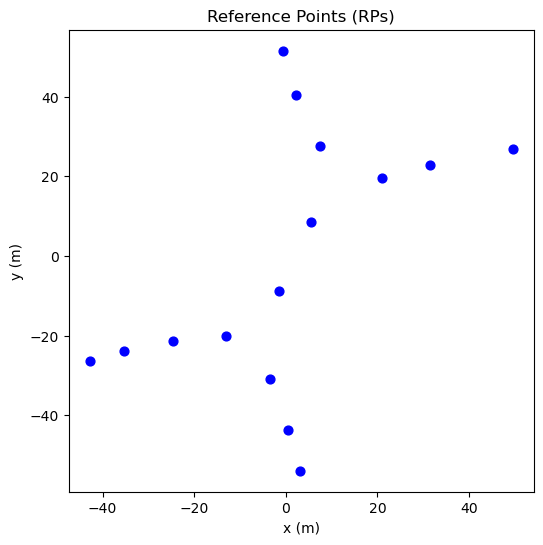

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(rps_df["x"], rps_df["y"], s=40, c="blue")
plt.title("Reference Points (RPs)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

### Plot Graph Edges

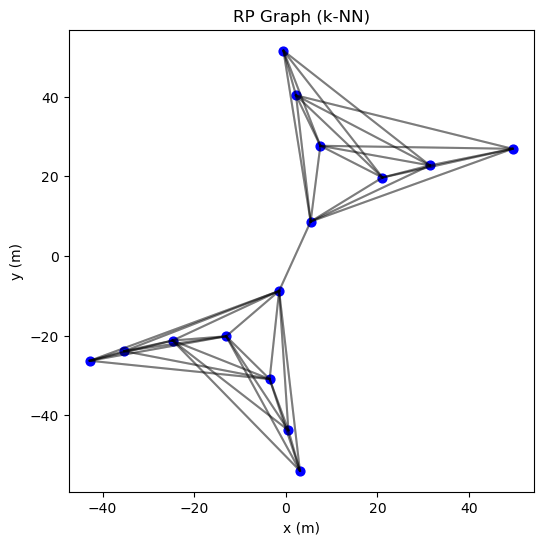

In [21]:
plt.figure(figsize=(6,6))

# Plot nodes
plt.scatter(rps_df["x"], rps_df["y"], s=40, c="blue")

# Plot edges
coords = rps_df[["x", "y"]].to_numpy()
for src, dst, dist in graph["edges"]:
    x1, y1 = coords[src]
    x2, y2 = coords[dst]
    plt.plot([x1, x2], [y1, y2], "k-", alpha=0.3)

plt.title("RP Graph (k-NN)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

### Inspect RP Features

In [23]:
# rps_df["feature"].iloc[0]
rps_df

,domain_id,rp_id,x,y,ap_ids,rssi
0,0_0,rp_0,-13.024299,-20.180508,"[7, 13, 14, 23, 24, 53, 54, 71, 72, 80, 81, 15...","[-82.05, -76.0, -76.17948717948718, -90.0, -89..."
1,0_0,rp_1,2.217162,40.301685,"[27, 28, 33, 34, 51, 52, 57, 58, 75, 76, 161, ...","[-82.75, -83.2, -73.009009009009, -72.24038461..."
2,0_0,rp_2,49.471103,26.878973,"[27, 28, 30, 36, 57, 58, 75, 76, 33, 34, 35, 1...","[-86.6, -85.44736842105263, -87.57142857142857..."
3,0_0,rp_3,0.546451,-43.770291,"[7, 13, 23, 24, 29, 30, 53, 54, 80, 81, 155, 1...","[-55.0, -87.57894736842105, -77.73333333333333..."
4,0_0,rp_4,21.089140,19.669531,"[25, 28, 33, 51, 52, 57, 58, 71, 72, 75, 76, 1...","[-92.0, -81.71428571428571, -81.73333333333333..."
5,0_0,rp_5,-35.268816,-23.917658,"[7, 23, 24, 39, 40, 41, 53, 54, 80, 81, 155, 1...","[-82.60714285714286, -92.2, -91.625, -68.21666..."
6,0_0,rp_6,-0.529306,51.497956,"[31, 33, 34, 57, 58, 75, 76, 272, 17, 27, 28, ...","[-87.33333333333333, -68.79411764705883, -68.6..."
7,0_0,rp_7,-1.472716,-8.800491,"[19, 20, 25, 26, 50, 71, 72, 161, 162, 280, 32...","[-84.0, -86.0, -72.62745098039215, -74.8644067..."
8,0_0,rp_8,-3.538862,-30.936946,"[7, 13, 14, 23, 24, 39, 41, 53, 54, 80, 81, 15...","[-67.14516129032258, -75.38461538461539, -76.0..."
9,0_0,rp_9,7.528638,27.636058,"[27, 28, 33, 34, 51, 52, 57, 58, 75, 76, 161, ...","[-75.73333333333333, -75.93333333333334, -81.0..."


# Visualize Training & Validation Samples

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

train_samples = pd.read_parquet("data/processed/samples/train_samples.parquet")
val_samples = pd.read_parquet("data/processed/samples/val_samples.parquet")

train_samples.head()

,domain_id,x,y,aps
0,1_2,5.329429e+06,4.056977e+06,"[{'ap_id': 'WAP090', 'rssi': -67.0}, {'ap_id':..."
1,1_2,4.858856e+06,5.552215e+06,"[{'ap_id': 'WAP090', 'rssi': -46.0}, {'ap_id':..."
2,1_2,3.088409e+06,7.254276e+06,"[{'ap_id': 'WAP090', 'rssi': -66.0}, {'ap_id':..."
3,1_2,3.637518e+06,5.537515e+06,"[{'ap_id': 'WAP035', 'rssi': -92.0}, {'ap_id':..."
4,0_0,1.051302e+05,2.739581e+06,[]


### Plot Training Samples

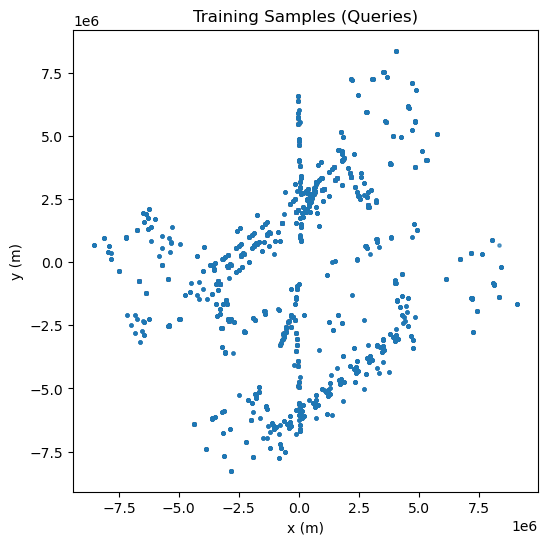

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(train_samples["x"], train_samples["y"], s=5, alpha=0.3)
plt.title("Training Samples (Queries)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

### Plot Validation Samples

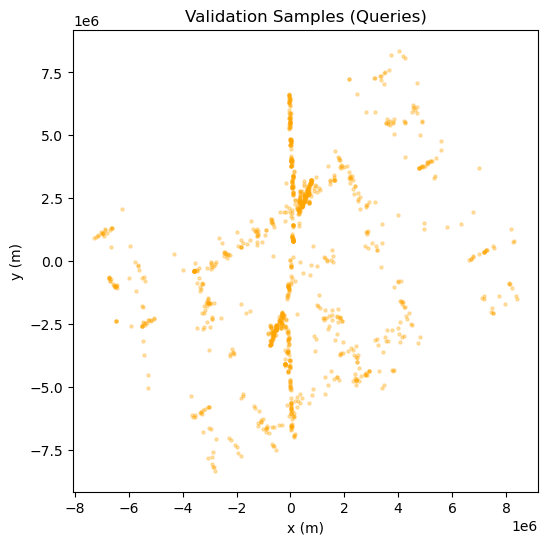

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(val_samples["x"], val_samples["y"], s=5, alpha=0.3, c="orange")
plt.title("Validation Samples (Queries)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

### Compare Sample Density vs RP Density

In [ ]:
import pandas as pd

# Load RPs for one domain
rp_path = list(Path("data/processed/rps").glob("train_rps_*.parquet"))[0]
rps_df = pd.read_parquet(rp_path)

plt.figure(figsize=(6,6))
plt.scatter(train_samples["x"], train_samples["y"], s=5, alpha=0.2, label="Samples")
plt.scatter(rps_df["x"], rps_df["y"], s=40, c="red", label="RPs")
plt.legend()
plt.title("Samples vs RPs")
plt.show()

TypeError: issubclass() arg 1 must be a class

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# PARAMETER: choose the domain you want to visualize
# Example formats: "0_0", "1_2", "2_4"
# ---------------------------------------------------------
DOMAIN_ID = "0_0"   # <-- change this anytime


# ---------------------------------------------------------
# Load samples for this domain
# ---------------------------------------------------------
train_samples = pd.read_parquet("data/processed/samples/train_samples.parquet")
domain_samples = train_samples[train_samples["domain_id"] == DOMAIN_ID]

if len(domain_samples) == 0:
    raise ValueError(f"No samples found for domain {DOMAIN_ID}")


# ---------------------------------------------------------
# Load RPs for this domain
# ---------------------------------------------------------
rp_path = Path(f"data/processed/rps/train_rps_{DOMAIN_ID}.parquet")
if not rp_path.exists():
    raise FileNotFoundError(f"RP file not found for domain {DOMAIN_ID}: {rp_path}")

rps_df = pd.read_parquet(rp_path)


print(f"Samples in domain {DOMAIN_ID}: {len(domain_samples)}")
print(f"RPs in domain {DOMAIN_ID}: {len(rps_df)}")

# ---------------------------------------------------------
# Plot samples + RPs
# ---------------------------------------------------------
plt.figure(figsize=(7,7))
plt.scatter(
    rps_df["x"], rps_df["y"],
    s=60, c="red", label="RPs"
)
plt.scatter(
    domain_samples["x"], domain_samples["y"],
    s=5, alpha=0.5, label="Samples"
)


plt.legend()
plt.title(f"Samples vs RPs — Domain {DOMAIN_ID}")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

TypeError: issubclass() arg 1 must be a class

In [8]:
from pathlib import Path
import pandas as pd

DOMAINS_DIR = Path("data/interim/domains")

def list_train_domains():
    return sorted(DOMAINS_DIR.glob("train_domain_*.parquet"))

def main():
    rows = []

    for domain_path in list_train_domains():
        df = pd.read_parquet(domain_path)

        domain_id = domain_path.stem.replace("train_domain_", "")

        n_spaces = df["space_id"].nunique()
        n_unique_positions = df[["x", "y"]].drop_duplicates().shape[0]

        rows.append((domain_id, n_spaces, n_unique_positions))

    # Affichage propre
    print(f"{'Domain':<10} {'#Spaces':<10} {'#UniquePositions':<20}")
    print("-" * 40)
    for domain_id, n_spaces, n_unique_positions in rows:
        print(f"{domain_id:<10} {n_spaces:<10} {n_unique_positions:<20}")

if __name__ == "__main__":
    main()

Domain     #Spaces    #UniquePositions    
----------------------------------------
0_0        54         54                  
0_1        66         67                  
0_2        68         70                  
0_3        68         68                  
1_0        49         76                  
1_1        38         60                  
1_2        45         79                  
1_3        30         50                  
2_0        44         67                  
2_1        60         89                  
2_2        57         73                  
2_3        91         113                 
2_4        65         67                  


### Inspect AP‑wise Fingerprint Example

In [22]:
train_samples.iloc[0]["aps"][:10]

array([{'ap_id': 'WAP090', 'rssi': -67.0},
       {'ap_id': 'WAP091', 'rssi': -68.0},
       {'ap_id': 'WAP103', 'rssi': -68.0},
       {'ap_id': 'WAP104', 'rssi': -68.0},
       {'ap_id': 'WAP105', 'rssi': -78.0},
       {'ap_id': 'WAP106', 'rssi': -79.0},
       {'ap_id': 'WAP125', 'rssi': -92.0},
       {'ap_id': 'WAP126', 'rssi': -95.0},
       {'ap_id': 'WAP166', 'rssi': -91.0},
       {'ap_id': 'WAP167', 'rssi': -89.0}], dtype=object)

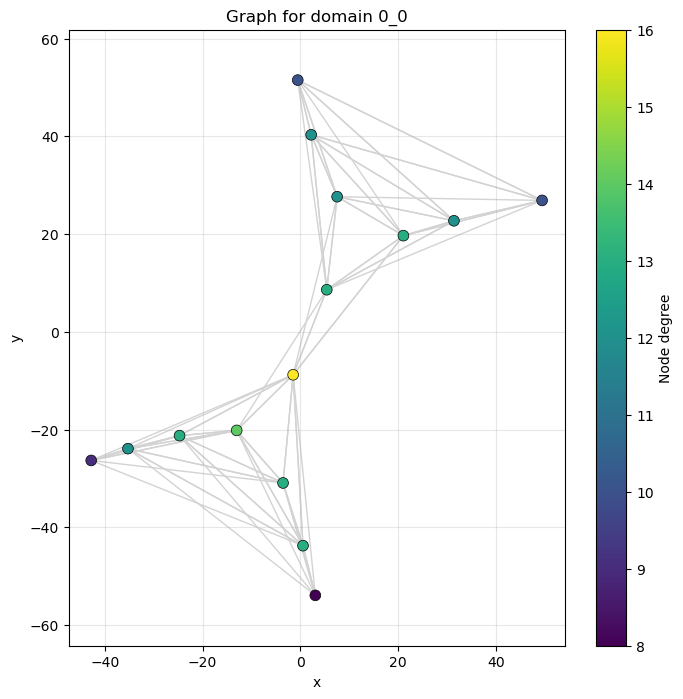

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

GRAPHS_DIR = Path("data/processed/graphs")

def load_graph(domain_id):
    path = GRAPHS_DIR / f"train_graph_{domain_id}.json"
    with open(path) as f:
        return json.load(f)

def plot_graph(graph, figsize=(8, 8), title=None):
    coords = np.array(graph["coords"])
    edges = graph["edges"]

    x = coords[:, 0]
    y = coords[:, 1]

    # Compute degree for optional coloring
    degree = np.zeros(len(coords), dtype=int)
    for u, v, _ in edges:
        degree[u] += 1
        degree[v] += 1

    plt.figure(figsize=figsize)

    # Draw edges
    for u, v, _ in edges:
        plt.plot(
            [coords[u, 0], coords[v, 0]],
            [coords[u, 1], coords[v, 1]],
            color="lightgray",
            linewidth=1,
            zorder=1,
        )

    # Draw nodes
    sc = plt.scatter(
        x, y,
        c=degree,
        cmap="viridis",
        s=60,
        edgecolors="black",
        linewidths=0.5,
        zorder=2
    )

    plt.colorbar(sc, label="Node degree")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title or "RP Graph")
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage:
graph = load_graph("0_0")   # replace with any domain ID
plot_graph(graph, title="Graph for domain 0_0")

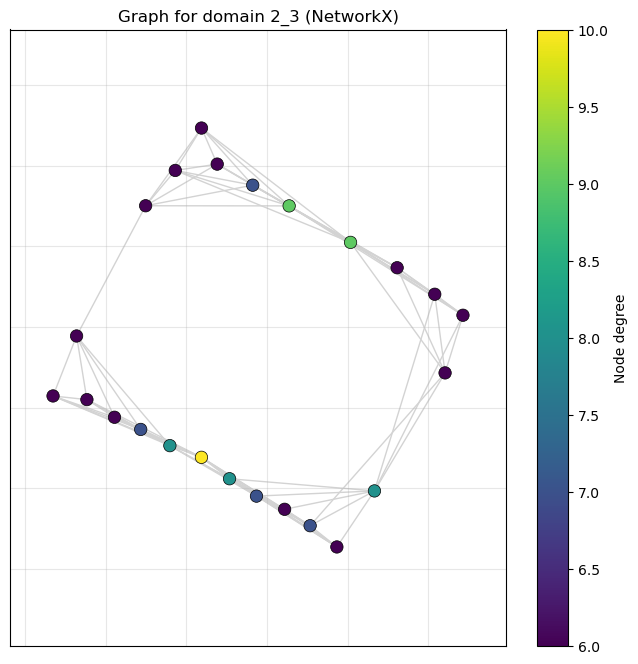

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from pathlib import Path

GRAPHS_DIR = Path("data/processed/graphs")

def load_graph(domain_id):
    path = GRAPHS_DIR / f"train_graph_{domain_id}.json"
    with open(path) as f:
        return json.load(f)

def plot_graph_nx(graph, figsize=(8, 8), title=None):
    G = nx.Graph()

    coords = np.array(graph["coords"])
    edges = graph["edges"]
    rp_ids = graph["rp_ids"]

    # Add nodes with positions
    for i, rp_id in enumerate(rp_ids):
        G.add_node(i, pos=(coords[i, 0], coords[i, 1]))

    # Add edges
    for u, v, d in edges:
        G.add_edge(u, v, weight=d)

    # Extract positions for drawing
    pos = nx.get_node_attributes(G, "pos")

    # Compute degree for coloring
    degrees = np.array([G.degree(n) for n in G.nodes()])

    plt.figure(figsize=figsize)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="lightgray", width=1)

    # Draw nodes
    sc = nx.draw_networkx_nodes(
        G,
        pos,
        node_size=80,
        node_color=degrees,
        cmap="viridis",
        edgecolors="black",
        linewidths=0.5,
    )

    plt.colorbar(sc, label="Node degree")
    plt.title(title or "RP Graph (NetworkX)")
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage:
graph = load_graph("2_3")   # replace with any domain ID
plot_graph_nx(graph, title="Graph for domain 2_3 (NetworkX)")